### **Exploratory Data Analysis**

#About Dataset

The dataset provided is a subset of the Titanic dataset, commonly used for data analysis and machine learning tasks. It contains information about passengers aboard the Titanic, including their survival status and various attributes. Below is an overview of the dataset and its columns:


#Dataset Overview
Source: Likely derived from the Kaggle Titanic dataset, which is based on historical records of passengers on the RMS Titanic.

Purpose: Used to analyze factors influencing survival rates and to build predictive models for survival.

Rows: The provided dataset contains 418 entries (as seen from PassengerId ranging from 892 to 1309).

Columns: 12 columns describing passenger attributes and survival status.
Column Descriptions

1. PassengerId (Integer)

  A unique identifier for each passenger.

  Example: 892, 893, ..., 1309.

  Use: Primarily for indexing and referencing passengers.

2. Survived (Integer, Binary)

  Indicates whether the passenger survived the Titanic disaster.
  
  Values: 0 (Did not survive), 1 (Survived).

  Example: 0 (Kelly, Mr. James did not survive), 1 (Wilkes, Mrs. James survived).
  
  Use: Target variable for predictive modeling.

3. Pclass (Integer, Categorical)

  Passenger class, indicating socio-economic status.

  Values: 1 (First class), 2 (Second class), 3 (Third class).

  Example: 3 (Third class for Kelly, Mr. James), 2 (Second class for Myles, Mr. Thomas Francis).

  Use: Analyzes class-based survival disparities.
4. Name (String)

  Full name of the passenger, often including titles (e.g., Mr., Mrs., Miss).
  Example: "Kelly, Mr. James", "Wilkes, Mrs. James (Ellen Needs)".
  Use: Can be used to extract titles or family information for feature engineering.
5. Sex (String, Categorical)
  
  Gender of the passenger.
  
  Values: "male", "female".

  Example: "male" (Kelly, Mr. James), "female" (Wilkes, Mrs. James).

  Use: Key factor in survival analysis, as women had higher survival rates.
6. Age (Float, Continuous)

  Age of the passenger in years. Some values are missing (NaN).

  Example: 34.5 (Kelly, Mr. James), 47 (Wilkes, Mrs. James), NaN (Ilieff, Mr. Ylio).
  
  Use: Analyzes age-related survival patterns; missing values need imputation.
7. SibSp (Integer)

  Number of siblings or spouses aboard the Titanic.

  Example: 0 (Kelly, Mr. James), 1 (Wilkes, Mrs. James).

  Use: Indicates family size, which may influence survival.

8. Parch (Integer)
  
  Number of parents or children aboard the Titanic.
  
  Example: 0 (Kelly, Mr. James), 0 (Wilkes, Mrs. James).

  Use: Complements SibSp to assess family connections.
10. Ticket (String)

  Ticket number for the passenger.

  Example: "330911" (Kelly, Mr. James), "363272" (Wilkes, Mrs. James).
  
  Use: Can be used to identify group travel or fare patterns, though often noisy.

11. Fare (Float, Continuous)
  
  Fare paid by the passenger (in pounds).

  Example: 7.8292 (Kelly, Mr. James), 7 (Wilkes, Mrs. James).
  
  Use: Proxy for wealth, correlates with Pclass and survival.

12. Cabin (String, Categorical)

  Cabin number(s) assigned to the passenger. Many values are missing (NaN).
  
  Example: NaN (Kelly, Mr. James), "B45" (Snyder, Mrs. John Pillsbury).
  
  Use: Indicates cabin location; missingness is a challenge, often converted to a binary feature (Has_Cabin).
  
13. Embarked (String, Categorical)

  Port of embarkation.

  Values: "C" (Cherbourg), "Q" (Queenstown), "S" (Southampton).

  Example: "Q" (Kelly, Mr. James), "S" (Wilkes, Mrs. James).

  Use: Analyzes embarkation point's influence on survival; may reflect socio-economic factors.

#Let's Begin

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns

Data Preprocessing

In [ ]:
#Load Dataset
df = pd.read_csv('/content/titanic.csv')

In [ ]:
#Data set first view
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [ ]:
df.describe() #Checking summery statestics

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
df.info() #Checkinh Data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
df.isnull().sum() #Checking missing Values

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


In [ ]:
# Age: Fill missing values with median age
df['Age'] = df['Age'].fillna(df['Age'].median())

In [ ]:
# Cabin: Too many missing values, so drop it
df = df.drop('Cabin', axis=1)

In [ ]:
df.duplicated().sum() #Checking for duplicates

np.int64(0)

Exploratory Data Analysis

In [ ]:
# Survival rate by passenger class
px.bar(df, x='Pclass', y='Survived', title='Survival Rate by Passenger Class')

In [ ]:
# Survival rate by sex
px.bar(df, x='Sex', y='Survived', title='Survival Rate by Sex')

In [ ]:
# Age distribution
px.histogram(df, x='Age', nbins=30, title='Age Distribution of Passengers', marginal="box")

In [ ]:
# Convert categorical variables
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

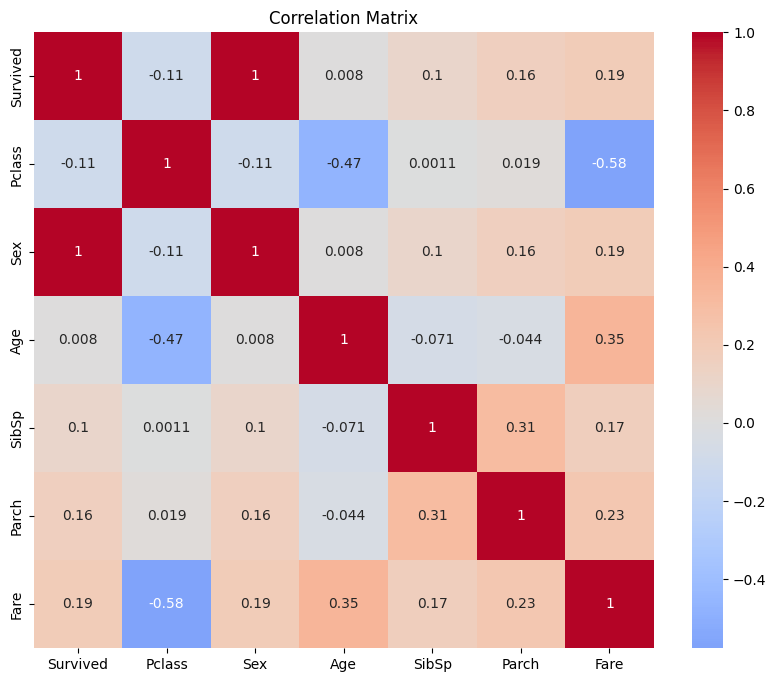

In [ ]:
# Correlation matrix
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
numeric_cols = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


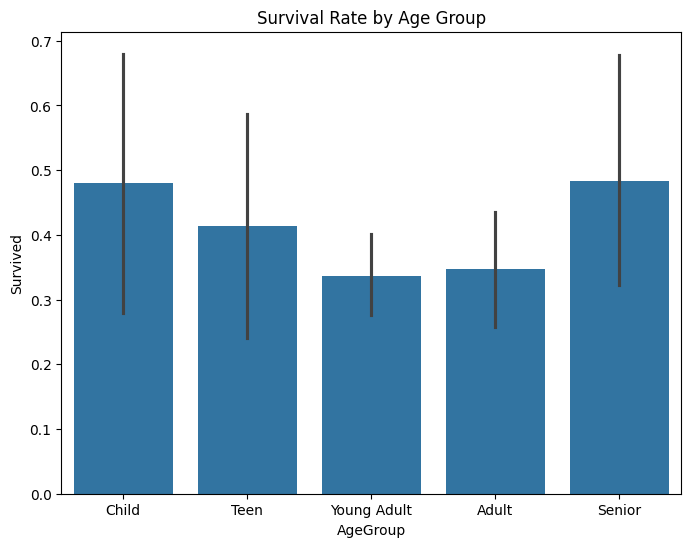

In [ ]:
# Survival rate by age group
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 30, 50, 80], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
plt.figure(figsize=(8, 6))
sns.barplot(x='AgeGroup', y='Survived', data=df)
plt.title('Survival Rate by Age Group')
plt.show()

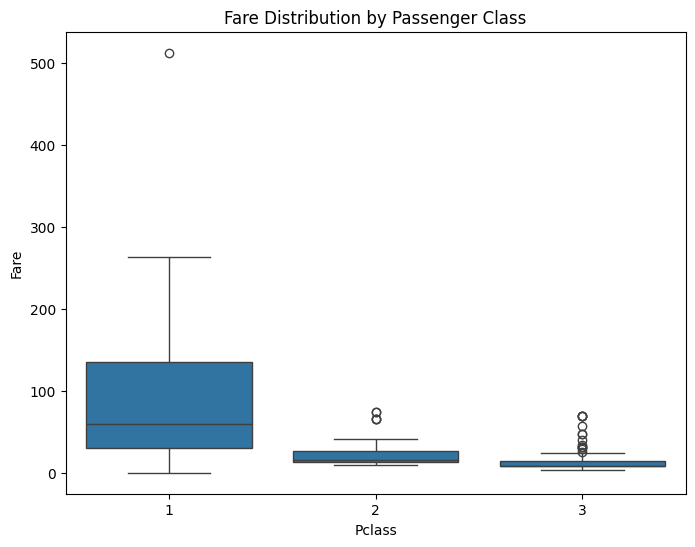

In [ ]:
# Fare distribution by class
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare Distribution by Passenger Class')
plt.show()

#Key Findings:
1. Higher passenger class (lower Pclass number) is associated with higher survival rates.
2. Females had a significantly higher survival rate than males.
3. Younger passengers, especially children, had higher survival rates.
4. Passengers with cabins had a higher survival rate.
5. Fare and passenger class are strongly correlated, indicating wealth's impact on survival.